In [2]:
! pip install itk

     |████████████████████████████████| 70.1MB 45kB/s 
     |████████████████████████████████| 16.6MB 211kB/s 
     |████████████████████████████████| 53.6MB 58kB/s 
     |████████████████████████████████| 94.7MB 34kB/s 
     |████████████████████████████████| 20.2MB 1.3MB/s 
     |████████████████████████████████| 15.0MB 209kB/s 


In [4]:
! pip install itkwidgets

     |████████████████████████████████| 3.4MB 25.7MB/s 
     |████████████████████████████████| 276kB 21.3MB/s 
     |████████████████████████████████| 112kB 43.9MB/s 
     |████████████████████████████████| 870kB 26.0MB/s 
     |████████████████████████████████| 2.2MB 35.4MB/s 


In [5]:
# Import all the necessary packages
import numpy as np
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [6]:
# Define the image path and load the data
image_path = "BraTS-Data/imagesTr/BRATS_001.nii.gz"
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

In [ ]:
# Extract data as numpy ndarray
image_data = image_obj.get_fdata()
type(image_data)

In [ ]:
# Get the image shape and print it out
height, width, depth, channels = image_data.shape
print(f"The image object has the following dimensions: height: {height}, width:{width}, depth:{depth}, channels:{channels}")

The "depth" listed above indicates that there are 155 layers (slices through the brain) in every image object. To visualize a single layer, run the cell below. Note that if the layer is one of the first or the last (i near 0 or 154), you won't find much information and the screen will be dark. Run this cell multiple times to look at different layers.

The code is set up to grab a random layer but you can select a specific layer by choosing a value for i from 0 to 154. You can also change which channel you're looking at by changing the channel variable.

In [ ]:
# Select random layer number
maxval = 154
i = np.random.randint(0, maxval)
# Define a channel to look at
channel = 0
print(f"Plotting Layer {i} Channel {channel} of Image")
plt.imshow(image_data[:, :, i, channel], cmap='gray')
plt.axis('off');

Interactive exploration
Another way to visualize this dataset is by using IPython Widgets to allow for an interactive exploration of the data.

Run the next cell to explore across different layers of the data. Move the slider to explore different layers. Change the channel value to explore different channels. See if you can tell which layer corresponds to the top of the brain and which corresponds to the bottom!

If you're feeling ambitious, try modifying the code below to slice along a different axis through the image object and look at other channels to see what you can discover!

In [ ]:
# Define a function to visualize the data
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 3
    plt.imshow(image_data[:, :, layer, channel], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, image_data.shape[2] - 1));

Explore the data labels
In this section, you'll read in a new dataset containing the labels for the MRI scan you loaded above.

Run the cell below to load the labels dataset for the image object you inspected above.

In [ ]:
# Define the data path and load the data
label_path = "./BraTS-Data/labelsTr/BRATS_001.nii.gz"
label_obj = nib.load(label_path)
type(label_obj)

In [ ]:
# Extract data labels
label_array = label_obj.get_fdata()
type(label_array)

In [ ]:
# Extract and print out the shape of the labels data
height, width, depth = label_array.shape
print(f"Dimensions of labels data array height: {height}, width: {width}, depth: {depth}")
print(f'With the unique values: {np.unique(label_array)}')
print("""Corresponding to the following label categories: 
0: for normal 
1: for edema
2: for non-enhancing tumor 
3: for enhancing tumor""")

Visualize the labels for a specific layer
Run the next cell to visualize a single layer of the labeled data. The code below is set up to show a single layer and you can set i to any value from 0 to 154 to look at a different layer.

Note that if you choose a layer near 0 or 154 there might not be much to look at in the images.

In [ ]:
# Define a single layer for plotting
layer = 50
# Define a dictionary of class labels
classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}
# Set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[:,:,layer]
    mask = np.where(img == classes_dict[img_label_str], 255, 0)
    ax[i].imshow(mask)
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()

In [ ]:
# Create button values
select_class = ToggleButtons(
    options=['Normal','Edema', 'Non-enhancing tumor', 'Enhancing tumor'],
    description='Select Class:',
    disabled=False,
    button_style='info', 
    
)
# Create layer slider
select_layer = IntSlider(min=0, max=154, description='Select Layer', continuous_update=False)

    
# Define a function for plotting images
def plot_image(seg_class, layer):
    print(f"Plotting {layer} Layer Label: {seg_class}")
    img_label = classes_dict[seg_class]
    mask = np.where(label_array[:,:,layer] == img_label, 255, 0)
    plt.figure(figsize=(10,5))
    plt.imshow(mask, cmap='gray')
    plt.axis('off');

# Use the interactive() tool to create the visualization
interactive(plot_image, seg_class=select_class, layer=select_layer)

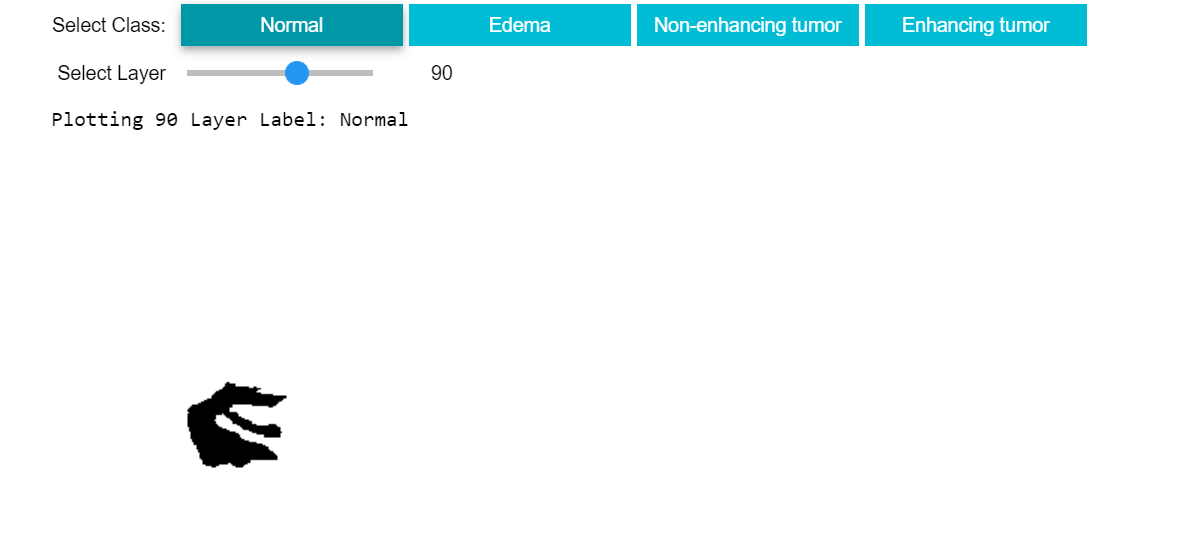